In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# الف

In [32]:
df=pd.read_csv('MOVIE_IMDB.csv')
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# ب

In [33]:
print("Total Null in Dataset is {}".format(df.isnull().sum().sum()))

Total Null in Dataset is 2698


In [34]:
null_ser=df.isnull().mean()*100
pd.DataFrame(index=null_ser.index,data={'null':null_ser.values.round(decimals=2)})

,null
color,0.38
director_name,2.06
num_critic_for_reviews,0.99
duration,0.30
director_facebook_likes,2.06
actor_3_facebook_likes,0.46
actor_2_name,0.26
actor_1_facebook_likes,0.14
gross,17.53
genres,0.00


# پ

In [35]:
df.drop(['color',
        'director_facebook_likes',
        'actor_1_facebook_likes',
        'actor_2_facebook_likes',
        'actor_3_facebook_likes',
        'actor_2_name',
        'cast_total_facebook_likes',
        'actor_3_name',
        'duration',
        'facenumber_in_poster',
        'content_rating',
        'country',
        'movie_imdb_link',
        'aspect_ratio',
        'plot_keywords'],axis=1,inplace=True)

In [36]:
df.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
4,Doug Walker,NaN,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,NaN,NaN,NaN,7.1,0


In [37]:
print("Total Null in Dataset is {}".format(df.isnull().sum().sum()))

Total Null in Dataset is 1678


In [38]:
print("Precent Null in each column is\n{}".format((df.isnull().mean()*100).round(decimals=2)))

Precent Null in each column is
director_name              2.06
num_critic_for_reviews     0.99
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64


In [39]:
S=df.isnull().mean()
sel_col=S.where(S*100>5.00).dropna().index
idx=df[sel_col].dropna(axis=0).index
df=df.iloc[idx]


In [40]:
df

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263700000.0,2012.0,6.6,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Shane Carruth,143.0,424760.0,Drama|Sci-Fi|Thriller,Shane Carruth,Primer,72639,371.0,English,7000.0,2004.0,7.0,19000
5034,Neill Dela Llana,35.0,70071.0,Thriller,Ian Gamazon,Cavite,589,35.0,English,7000.0,2005.0,6.3,74
5035,Robert Rodriguez,56.0,2040920.0,Action|Crime|Drama|Romance|Thriller,Carlos Gallardo,El Mariachi,52055,130.0,Spanish,7000.0,1992.0,6.9,0
5037,Edward Burns,14.0,4584.0,Comedy|Drama,Kerry Bishé,Newlyweds,1338,14.0,English,9000.0,2011.0,6.4,413


In [41]:
print("Total Null in Dataset is {}".format(df.isnull().sum().sum()))

Total Null in Dataset is 7


In [42]:
print("Precent Null in each column is\n{}".format((df.isnull().mean()*100).round(decimals=2)))

Precent Null in each column is
director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.08
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64


In [43]:
df['language']=df['language'].fillna('English')

In [44]:
print("Total Null in Dataset is {}".format(df.isnull().sum().sum()))

Total Null in Dataset is 4


In [45]:
print("Precent Null in each column is\n{}".format((df.isnull().mean()*100).round(decimals=2)))

Precent Null in each column is
director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.08
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64


the dataset has 4 NaN values because NaN indexes in column gross and budget columns have not intersected with NaN value indexes in num_critic_for_reviews column

# ت

In [46]:
df.drop_duplicates(inplace=True)

In [47]:
df['profit']=df['gross'] - df['budget']

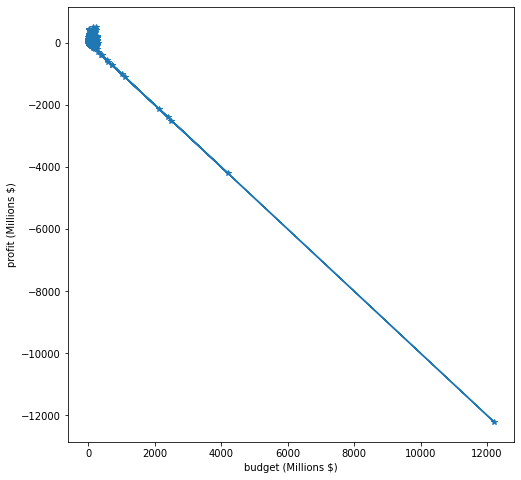

In [52]:
plt.figure(figsize=(8,8))
plt.xlabel('budget (Millions $)')
plt.ylabel('profit (Millions $)')
plt.plot(df['budget']/1e6,df['profit']/1e6,'-*')
plt.show()

# Reasoning
it's obvious that by increasing the budget , profit decreases and We can find the law "lower budget has more profit"

In [53]:
idx=df['profit'].sort_values(ascending=False).index[0:10]
df.iloc[idx][['movie_title']]

,movie_title
0,Avatar
30,Skyfall
27,Captain America: Civil War
3476,The Great Gatsby
3554,Annabelle
18,Pirates of the Caribbean: On Stranger Tides
536,The Terminal
251,San Andreas
68,Monsters vs. Aliens
461,Eagle Eye


#  ث

In [54]:
df.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000,523505847.0
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0,9404152.0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000,-44925825.0
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000,198130642.0
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738.0,English,263700000.0,2012.0,6.6,24000,-190641321.0


In [55]:
df['genres']=df['genres'].apply(lambda x:x.split('|'))
unique_genres=list(set(list(np.hstack(df['genres'].values))))
print(unique_genres)

['Family', 'Romance', 'Thriller', 'Short', 'Drama', 'Comedy', 'Adventure', 'Fantasy', 'Mystery', 'Sport', 'History', 'Western', 'Action', 'Horror', 'Documentary', 'Musical', 'Biography', 'Animation', 'War', 'Music', 'Sci-Fi', 'Film-Noir', 'Crime']


In [56]:
count=[]
income=[]
for i in unique_genres:
    count.append(df['genres'].apply(lambda x:True if i in x else False  ).sum())
    income.append(df['profit'][df['genres'].apply(lambda x:True if i in x else False)].mean())

In [57]:
d={'number of films':count,'income mean':income}
pd.DataFrame(data=d,index=unique_genres)

,number of films,income mean
Family,451,2.174737e+07
Romance,879,9.791504e+06
Thriller,1118,4.644835e+06
Short,2,9.092670e+05
Drama,1944,-3.307779e+06
Comedy,1503,8.159866e+06
Adventure,787,1.326438e+07
Fantasy,514,1.689471e+07
Mystery,384,1.053247e+07
Sport,151,1.143705e+07


# ج

In [60]:
df[(df['title_year']>=2007.0) & (df['title_year']<=2015.0) ]

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760505847.0,"[Action, Adventure, Fantasy, Sci-Fi]",CCH Pounder,Avatar,886204,3054.0,English,237000000.0,2009.0,7.9,33000,523505847.0
1,Gore Verbinski,302.0,309404152.0,"[Action, Adventure, Fantasy]",Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,300000000.0,2007.0,7.1,0,9404152.0
2,Sam Mendes,602.0,200074175.0,"[Action, Adventure, Thriller]",Christoph Waltz,Spectre,275868,994.0,English,245000000.0,2015.0,6.8,85000,-44925825.0
3,Christopher Nolan,813.0,448130642.0,"[Action, Thriller]",Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,250000000.0,2012.0,8.5,164000,198130642.0
5,Andrew Stanton,462.0,73058679.0,"[Action, Adventure, Sci-Fi]",Daryl Sabara,John Carter,212204,738.0,English,263700000.0,2012.0,6.6,24000,-190641321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4987,Lena Dunham,113.0,389804.0,"[Comedy, Drama, Romance]",Lena Dunham,Tiny Furniture,11816,35.0,English,65000.0,2010.0,6.3,0,324804.0
5004,Mike Bruce,3.0,243768.0,[Western],Joseph Campanella,The Legend of God's Gun,143,9.0,English,30000.0,2007.0,4.1,13,213768.0
5012,David Ayer,233.0,10499968.0,"[Action, Crime, Drama, Thriller]",Mireille Enos,Sabotage,47502,212.0,English,35000000.0,2014.0,5.7,10000,-24500032.0
5023,Daryl Wein,22.0,76382.0,[Romance],Zoe Lister-Jones,Breaking Upwards,1194,8.0,English,15000.0,2009.0,6.2,324,61382.0


In [59]:
A=df[(df['title_year']>=2007.0) & (df['title_year']<=2015.0) & (df['imdb_score'] >=7.5) & (df['imdb_score'] <=8.5)]
selected_genres=list(set(list(np.hstack(A['genres'].values))))
print(selected_genres)

['Family', 'Romance', 'Thriller', 'Drama', 'Comedy', 'Adventure', 'Fantasy', 'Mystery', 'Sport', 'History', 'Western', 'Action', 'Documentary', 'Horror', 'Musical', 'Biography', 'Animation', 'War', 'Music', 'Sci-Fi', 'Crime']


# چ

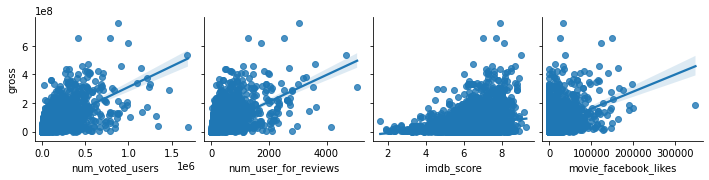

In [61]:
sns.pairplot(df[['num_voted_users','num_user_for_reviews','imdb_score','movie_facebook_likes','gross']],y_vars=['gross'],x_vars=['num_voted_users','num_user_for_reviews','imdb_score','movie_facebook_likes'],kind="reg",plot_kws={'line_kws': {'color': 'black'}})

# Reasoning
these figures show us factors that user involve in those, these have a good effect on gross because a positive enough slope appears in the figures 